In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

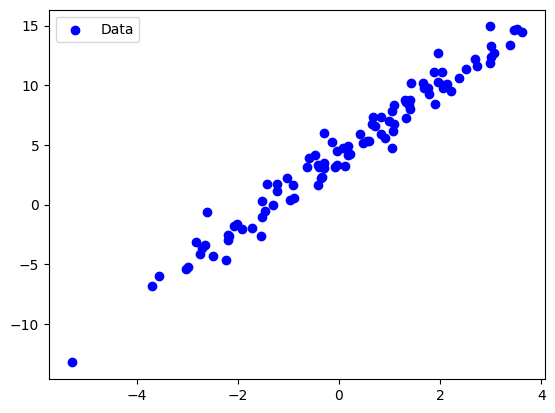

In [2]:
n=100
X=2*np.random.randn(n,1)

y_true=4+3*X+np.random.randn(n,1)

plt.scatter(X,y_true,color='blue',label="Data")

plt.legend()
plt.show()

In [3]:
def LS(x,y):
    x2=x**2
    xy=x*y
    
    theta1=(n*np.sum(xy)- (np.sum(x)*np.sum(y))) / (n*np.sum(x2) - np.sum(x)**2)
    theta0= (np.sum(y)- theta1*np.sum(x))/n
    
    return theta0,theta1
    

3.979074315267627 2.8931115087951307


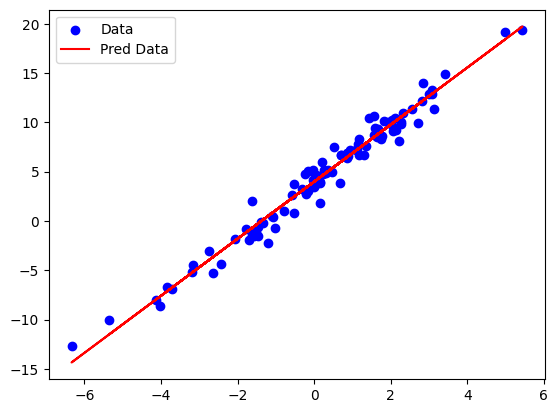

In [5]:
n=100
X=2*np.random.randn(n,1)

y_true=4+3*X+np.random.randn(n,1)

plt.scatter(X,y_true,color='blue',label="Data")

theta0,theta1=LS(X,y_true)
print(theta0,theta1)
y_pred=theta0+theta1*X
plt.plot(X,y_pred,color="red",label="Pred Data")

plt.legend()
plt.show()

In [ ]:
theta = np.linalg.int(X.T @ X)@ X.T @ Y


In [7]:
X=np.array([[1,2,3],[4,5,6]])

print(X)
print(X.shape)

[[1 2 3]
 [4 5 6]]
(2, 3)


In [8]:
X.T

array([[1, 4],
       [2, 5],
       [3, 6]])

[[ 7.02105021e+00  4.02105021e+00]
 [-1.44866866e-03  2.99855133e+00]]


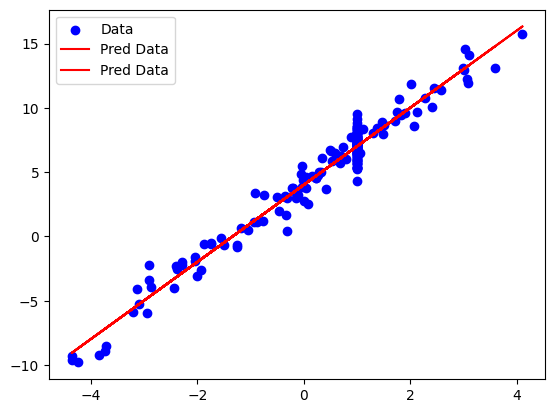

In [16]:
n=100
X1=2*np.random.randn(n,1)
X=np.c_[np.ones(len(X1)),X1]
Y=4+3*X+np.random.randn(n,1)
plt.scatter(X,Y,color='blue',label="Data")

theta=np.linalg.inv(X.T @ X)@ X.T @ Y
print(theta)
y_pred=X @ theta
plt.plot(X,y_pred,color="red",label="Pred Data")

plt.legend()
plt.show()

In [20]:
X1=2*np.random.randn(n,1)
X2=X1*2

X=np.c_[X1,X2]
X
#np.linalg.inv(X)


array([[-1.09456259, -2.18912518],
       [-2.10117433, -4.20234866],
       [-3.36119822, -6.72239645],
       [-1.67114376, -3.34228752],
       [ 3.93962979,  7.87925958],
       [-1.44094573, -2.88189147],
       [ 2.40508869,  4.81017738],
       [-0.17466835, -0.34933671],
       [ 2.47491217,  4.94982434],
       [-0.60793819, -1.21587637],
       [-2.73825662, -5.47651324],
       [-2.14993916, -4.29987833],
       [ 0.2419162 ,  0.48383241],
       [ 2.85645776,  5.71291552],
       [ 1.16998279,  2.33996557],
       [-1.50186581, -3.00373162],
       [ 0.31449501,  0.62899002],
       [ 2.30602496,  4.61204991],
       [ 3.01619175,  6.0323835 ],
       [ 1.57336457,  3.14672915],
       [ 1.38747761,  2.77495521],
       [ 0.25971471,  0.51942942],
       [ 1.7691013 ,  3.5382026 ],
       [-0.68001948, -1.36003896],
       [-0.27861313, -0.55722627],
       [ 2.29294262,  4.58588524],
       [ 3.39892048,  6.79784095],
       [ 1.64054555,  3.2810911 ],
       [ 1.41345835,

In [47]:
def GD(x,y,alpha=0.1,epoc=100):
    theta_0=0
    theta_1=0
    n=len(x)
    
    for _ in range(epoc):
        y_pred=theta_0+theta_1*x
        
        d_theta_0 = (-2/n) * sum(y - y_pred)
        d_theta_1 = (-2/n) * sum((y - y_pred) * x)
        
        theta_0= theta_0 - alpha * d_theta_0
        theta_1= theta_1 - alpha * d_theta_1
        
    return theta_0,theta_1
        
        

[4.01484842] [2.89945235]


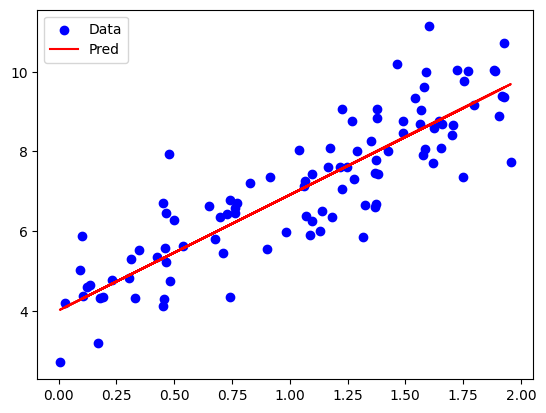

In [53]:
x=2*np.random.rand(100,1)
y=4+3*x + np.random.randn(100,1)

plt.scatter(x,y , color='blue' , label="Data")

theta_0,theta_1= GD (x,y,0.1,100)
print(theta_0,theta_1)
y_pred=theta_0+theta_1*x

plt.plot(x,y_pred,color="red",label="Pred")

plt.legend()

plt.show()

In [55]:
def GD(x,y,alpha=0.1,epoc=100):
    theta_0=0
    theta_1=0
    n=len(x)
    cost=[]
    for _ in range(epoc):
        y_pred=theta_0+theta_1*x
        cost.append((1/n) * np.sum((y_pred-y)**2))
        
        d_theta_0 = (-2/n) * sum(y - y_pred)
        d_theta_1 = (-2/n) * sum((y - y_pred) * x)
        
        
        theta_0= theta_0 - alpha * d_theta_0
        theta_1= theta_1 - alpha * d_theta_1
        
    return theta_0,theta_1,cost
        
        

[3.68670136] [3.35606582]


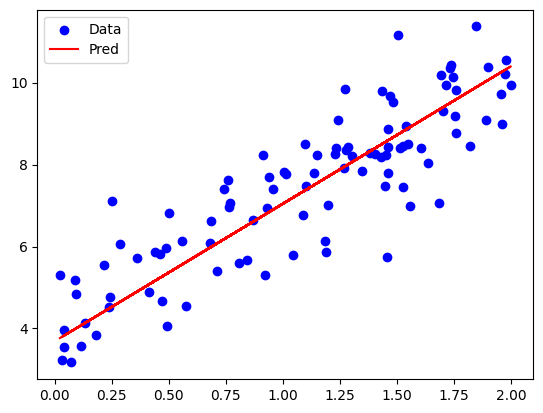

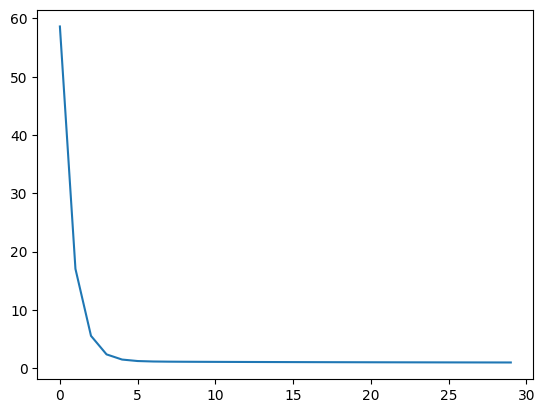

In [62]:
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)
theta_0,theta_1,cost= GD(x,y,0.1,30)

plt.scatter(x,y , color='blue' , label="Data")
y_pred=theta_0+theta_1*x
print(theta_0,theta_1)
plt.plot(x,y_pred,color="red",label="Pred")

plt.legend()

plt.show()

plt.plot(cost)

In [85]:
def GD_milti(x,y,alpha=0.1,epoch=100):
    n_samples,n_features=x.shape
    theta = np.zeros(n_features)
    
    for _ in range(epoch):
        y_pred=x.dot(theta)
        gradient=(2/n_samples) * x.T.dot(y_pred-y)
        theta = theta - alpha * gradient
        
        return theta
        

def add_bias_feature(X):
    return np.column_stack((np.ones(len(X)),X))

In [87]:
from sklearn.metrics import mean_squared_error

In [102]:
n=100000
X= 2 *np.random.rand(n,3)
y=4+X.dot(np.array([3,1.5,2]))+np.random.randn(n)
X_bias= add_bias_feature(X)
theta = GD_milti(X_bias,y,0.1,10000)
y_pred=X_bias @ theta
print(mean_squared_error(y,y_pred))
print(theta)

4.156950079672883
[2.09839717 2.29784708 2.19833087 2.22644188]


In [63]:
X=np.array([[1,2,3],[4,5,6]])

print(X)
print(X.shape)

[[1 2 3]
 [4 5 6]]
(2, 3)


In [65]:
np.zeros(50)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])